In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
data = pd.read_csv('IMDB-Movie-Data.csv')

In [3]:
data.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [4]:
data.shape

(1000, 12)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Title               1000 non-null   object 
 2   Genre               1000 non-null   object 
 3   Description         1000 non-null   object 
 4   Director            1000 non-null   object 
 5   Actors              1000 non-null   object 
 6   Year                1000 non-null   int64  
 7   Runtime (Minutes)   1000 non-null   int64  
 8   Rating              1000 non-null   float64
 9   Votes               1000 non-null   int64  
 10  Revenue (Millions)  872 non-null    float64
 11  Metascore           936 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB


In [6]:
data.isnull().sum()

Rank                    0
Title                   0
Genre                   0
Description             0
Director                0
Actors                  0
Year                    0
Runtime (Minutes)       0
Rating                  0
Votes                   0
Revenue (Millions)    128
Metascore              64
dtype: int64

<AxesSubplot:>

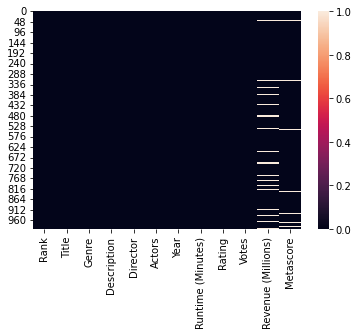

In [10]:
sns.heatmap(data.isnull())

In [11]:
# Finding percentage of missing values
data.isnull().sum()/data.shape[0]*100

Rank                   0.0
Title                  0.0
Genre                  0.0
Description            0.0
Director               0.0
Actors                 0.0
Year                   0.0
Runtime (Minutes)      0.0
Rating                 0.0
Votes                  0.0
Revenue (Millions)    12.8
Metascore              6.4
dtype: float64

In [12]:
# Another way to find percentage of missing values
data.isnull().mean()*100

Rank                   0.0
Title                  0.0
Genre                  0.0
Description            0.0
Director               0.0
Actors                 0.0
Year                   0.0
Runtime (Minutes)      0.0
Rating                 0.0
Votes                  0.0
Revenue (Millions)    12.8
Metascore              6.4
dtype: float64

In [13]:
# Another way to find percentage of missing values
data.isnull().sum()/len(data)*100

Rank                   0.0
Title                  0.0
Genre                  0.0
Description            0.0
Director               0.0
Actors                 0.0
Year                   0.0
Runtime (Minutes)      0.0
Rating                 0.0
Votes                  0.0
Revenue (Millions)    12.8
Metascore              6.4
dtype: float64

In [14]:
# Dropping the missing values
data.dropna(inplace=True)

In [15]:
data.describe()

,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,838.000000,838.00000,838.000000,838.000000,8.380000e+02,838.000000,838.000000
mean,485.247017,2012.50716,114.638425,6.814320,1.932303e+05,84.564558,59.575179
std,286.572065,3.17236,18.470922,0.877754,1.930990e+05,104.520227,16.952416
min,1.000000,2006.00000,66.000000,1.900000,1.780000e+02,0.000000,11.000000
25%,238.250000,2010.00000,101.000000,6.300000,6.127650e+04,13.967500,47.000000
50%,475.500000,2013.00000,112.000000,6.900000,1.368795e+05,48.150000,60.000000
75%,729.750000,2015.00000,124.000000,7.500000,2.710830e+05,116.800000,72.000000
max,1000.000000,2016.00000,187.000000,9.000000,1.791916e+06,936.630000,100.000000


In [16]:
data.columns

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

In [24]:
# Movies having runtime greater than 180 minutes
data[data['Runtime (Minutes)'] >= 180]['Title']

82     The Wolf of Wall Street
88           The Hateful Eight
311             La vie d'Adèle
828                 Grindhouse
965              Inland Empire
Name: Title, dtype: object

In [29]:
# Finding which year is having highest average vote
data.groupby('Year')['Votes'].mean().sort_values(ascending=False)

Year
2012    285226.093750
2008    275505.384615
2006    269289.954545
2009    255780.647059
2010    252782.316667
2007    244331.037736
2011    240790.301587
2013    219049.648352
2014    203930.224490
2015    115726.220472
2016     48591.754209
Name: Votes, dtype: float64

Text(0.5, 1.0, 'Year vs Votes')

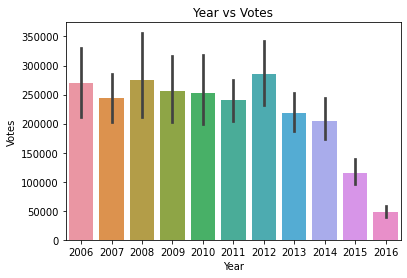

In [31]:
sns.barplot(x='Year', y='Votes', data=data)
plt.title('Year vs Votes')

In [32]:
data.groupby('Year')['Revenue (Millions)'].mean().sort_values(ascending=False)


Year
2009    112.601277
2012    107.973281
2010    105.081579
2008     99.082745
2007     87.882245
2011     87.612258
2013     87.121818
2006     86.296667
2014     85.078723
2015     78.355044
2016     54.690976
Name: Revenue (Millions), dtype: float64

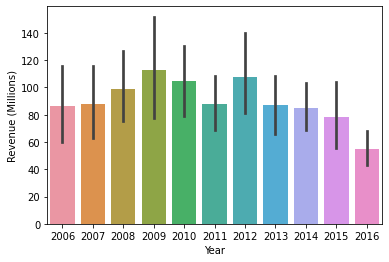

In [37]:
sns.barplot(x='Year', y='Revenue (Millions)', data=data)
plt.show()

In [46]:
# Average rating for each director
data.groupby('Director')['Rating'].mean()

Director
Aamir Khan             8.50
Abdellatif Kechiche    7.80
Adam Leon              6.50
Adam McKay             7.00
Adam Shankman          6.30
                       ... 
Xavier Dolan           7.55
Yimou Zhang            6.10
Yorgos Lanthimos       7.20
Zack Snyder            7.04
Zackary Adler          5.10
Name: Rating, Length: 644, dtype: float64

In [50]:
# Displaying top 10 movies with highest runtime and their title
top10_data = data.nlargest(10, 'Runtime (Minutes)')[['Title', 'Runtime (Minutes)']].set_index('Title')

In [51]:
top10_data

,Runtime (Minutes)
Title,
Grindhouse,191
The Hateful Eight,187
The Wolf of Wall Street,180
La vie d'Adèle,180
Inland Empire,180
Cloud Atlas,172
3 Idiots,170
Interstellar,169
Pirates of the Caribbean: At World's End,169


<AxesSubplot:xlabel='Runtime (Minutes)', ylabel='Title'>

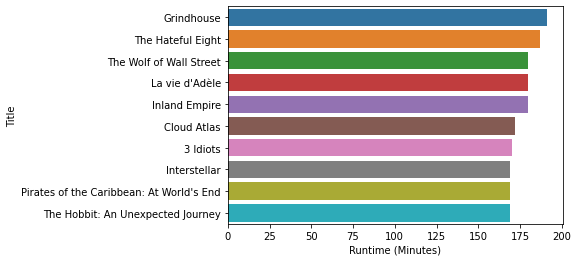

In [52]:
sns.barplot(x='Runtime (Minutes)', y=top10_data.index, data=top10_data)

In [53]:
# Number of movies released in each year
data['Year'].value_counts()

2016    297
2015    127
2014     98
2013     91
2012     64
2011     63
2010     60
2007     53
2008     52
2009     51
2006     44
Name: Year, dtype: int64

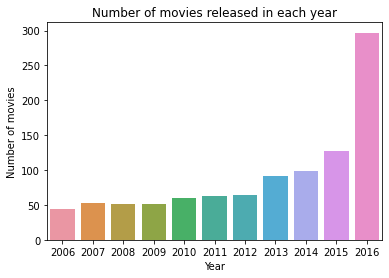

In [59]:
sns.countplot(x='Year', data=data)
plt.ylabel('Number of movies')
plt.title('Number of movies released in each year')
plt.show()

In [60]:
# Plotting movies title with highest rating along with director name
top10_data_new = data.nlargest(10, 'Rating')[['Title', 'Director', 'Rating']].set_index('Title')

In [61]:
top10_data_new

,Director,Rating
Title,,
The Dark Knight,Christopher Nolan,9.0
Inception,Christopher Nolan,8.8
Dangal,Nitesh Tiwari,8.8
Interstellar,Christopher Nolan,8.6
Kimi no na wa,Makoto Shinkai,8.6
The Intouchables,Olivier Nakache,8.6
The Prestige,Christopher Nolan,8.5
The Departed,Martin Scorsese,8.5
The Dark Knight Rises,Christopher Nolan,8.5


<AxesSubplot:xlabel='Rating', ylabel='Title'>

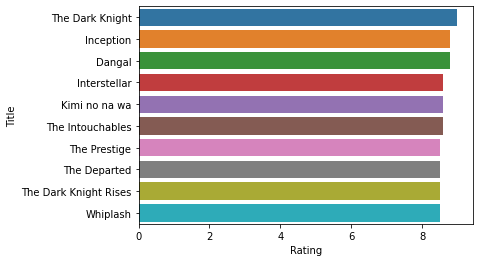

In [62]:
# Plotting barplot
sns.barplot(x='Rating', y=top10_data_new.index, data=top10_data_new)

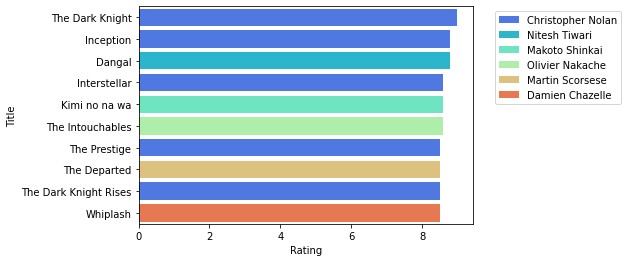

In [67]:
# Plotting barplot along with director name
sns.barplot(x='Rating', y=top10_data_new.index, data=top10_data_new, hue='Director', dodge=False, palette='rainbow') # hue is used to plot multiple columns in same plot
# dodge is used to remove overlapping of bars, if it is set to False then bars will not overlap each other
# Moving legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

In [68]:
# Displaying top 10 movies with highest revenue
top10_data_new = data.nlargest(10, 'Revenue (Millions)')[['Title', 'Revenue (Millions)']].set_index('Title')

In [69]:
top10_data_new

,Revenue (Millions)
Title,
Star Wars: Episode VII - The Force Awakens,936.63
Avatar,760.51
Jurassic World,652.18
The Avengers,623.28
The Dark Knight,533.32
Rogue One,532.17
Finding Dory,486.29
Avengers: Age of Ultron,458.99
The Dark Knight Rises,448.13


<AxesSubplot:xlabel='Revenue (Millions)', ylabel='Title'>

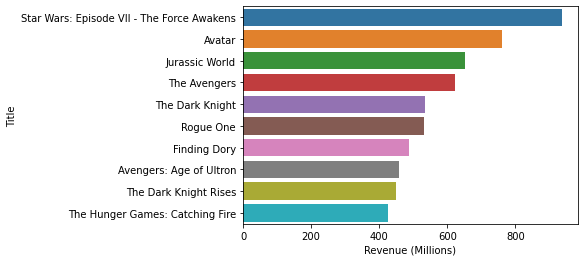

In [72]:
sns.barplot(x='Revenue (Millions)', y=top10_data_new.index, data=top10_data_new)

<AxesSubplot:xlabel='Rating', ylabel='Revenue (Millions)'>

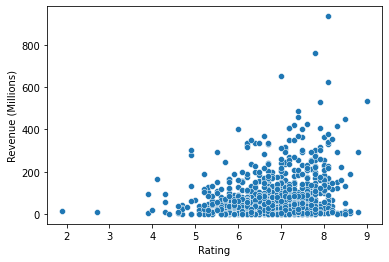

In [73]:
# Does rating affects revenue?
sns.scatterplot(x='Rating', y='Revenue (Millions)', data=data)

In [76]:
# Finding Unique Genres
# For this we need to split the genres column
data['Genre']

0       Action,Adventure,Sci-Fi
1      Adventure,Mystery,Sci-Fi
2               Horror,Thriller
3       Animation,Comedy,Family
4      Action,Adventure,Fantasy
                 ...           
995         Crime,Drama,Mystery
996                      Horror
997         Drama,Music,Romance
998            Adventure,Comedy
999       Comedy,Family,Fantasy
Name: Genre, Length: 1000, dtype: object

In [77]:
# Splitting the genres column. We will use split function to split the genres column
two_d_list = []
for i in data['Genre']:
    two_d_list.append(i.split(','))

In [78]:
two_d_list

[['Action', 'Adventure', 'Sci-Fi'],
 ['Adventure', 'Mystery', 'Sci-Fi'],
 ['Horror', 'Thriller'],
 ['Animation', 'Comedy', 'Family'],
 ['Action', 'Adventure', 'Fantasy'],
 ['Action', 'Adventure', 'Fantasy'],
 ['Comedy', 'Drama', 'Music'],
 ['Comedy'],
 ['Action', 'Adventure', 'Biography'],
 ['Adventure', 'Drama', 'Romance'],
 ['Adventure', 'Family', 'Fantasy'],
 ['Biography', 'Drama', 'History'],
 ['Action', 'Adventure', 'Sci-Fi'],
 ['Animation', 'Adventure', 'Comedy'],
 ['Action', 'Comedy', 'Drama'],
 ['Animation', 'Adventure', 'Comedy'],
 ['Biography', 'Drama', 'History'],
 ['Action', 'Thriller'],
 ['Biography', 'Drama'],
 ['Drama', 'Mystery', 'Sci-Fi'],
 ['Adventure', 'Drama', 'Thriller'],
 ['Drama'],
 ['Crime', 'Drama', 'Horror'],
 ['Animation', 'Adventure', 'Comedy'],
 ['Action', 'Adventure', 'Sci-Fi'],
 ['Comedy'],
 ['Action', 'Adventure', 'Drama'],
 ['Horror', 'Thriller'],
 ['Comedy'],
 ['Action', 'Adventure', 'Drama'],
 ['Comedy'],
 ['Drama', 'Thriller'],
 ['Action', 'Adventure

In [79]:
# Creating one-d list from two-d list
one_d_list = []
for i in two_d_list:
    for j in i:
        one_d_list.append(j)

In [80]:
one_d_list

['Action',
 'Adventure',
 'Sci-Fi',
 'Adventure',
 'Mystery',
 'Sci-Fi',
 'Horror',
 'Thriller',
 'Animation',
 'Comedy',
 'Family',
 'Action',
 'Adventure',
 'Fantasy',
 'Action',
 'Adventure',
 'Fantasy',
 'Comedy',
 'Drama',
 'Music',
 'Comedy',
 'Action',
 'Adventure',
 'Biography',
 'Adventure',
 'Drama',
 'Romance',
 'Adventure',
 'Family',
 'Fantasy',
 'Biography',
 'Drama',
 'History',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Animation',
 'Adventure',
 'Comedy',
 'Action',
 'Comedy',
 'Drama',
 'Animation',
 'Adventure',
 'Comedy',
 'Biography',
 'Drama',
 'History',
 'Action',
 'Thriller',
 'Biography',
 'Drama',
 'Drama',
 'Mystery',
 'Sci-Fi',
 'Adventure',
 'Drama',
 'Thriller',
 'Drama',
 'Crime',
 'Drama',
 'Horror',
 'Animation',
 'Adventure',
 'Comedy',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Comedy',
 'Action',
 'Adventure',
 'Drama',
 'Horror',
 'Thriller',
 'Comedy',
 'Action',
 'Adventure',
 'Drama',
 'Comedy',
 'Drama',
 'Thriller',
 'Action',
 'Adventure',
 'Sci-Fi',
 

In [81]:
unique_list = []
for i in one_d_list:
    if i not in unique_list:
        unique_list.append(i)

In [82]:
unique_list

['Action',
 'Adventure',
 'Sci-Fi',
 'Mystery',
 'Horror',
 'Thriller',
 'Animation',
 'Comedy',
 'Family',
 'Fantasy',
 'Drama',
 'Music',
 'Biography',
 'Romance',
 'History',
 'Crime',
 'Western',
 'War',
 'Musical',
 'Sport']

In [83]:
len(unique_list)

20

In [84]:
print("There are {} unique genres in the dataset".format(len(unique_list)))

There are 20 unique genres in the dataset
